# Problem Set 1
### Máté Szűcs
Matrikel-Nr.: 03772290

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
def gen_points(k, n=1000):
    """
    Generates a random k-dimensional subspace in R^n and returns 500 random points in that subspace.
    """
    # random nxk matrix
    M = np.random.randn(n, k)
    # QR decomposition, Q should be orthonormal basis
    U, _ = np.linalg.qr(M)
    # check if Q is orthonormal, so Q.T @ Q should be close to identity matrix, otherwise raise error
    # of course this should never happen, but nice to check
    assert np.allclose(np.eye(k), U.T @ U)
    # generate 500 random points in the subspace
    x = U.dot(np.random.randn(k, 500))
    return x, U

def denoise(x, U):
    """
    Denoises the input data x using the subspace U.
    """
    x_denoised = U @ U.T @ x
    return x_denoised

def avg_mean_squared_error(x, x_denoised):
    """
    Computes the average mean squared error between the original data x and the denoised data x_denoised.
    """
    return np.mean(np.sum((x - x_denoised)**2, axis=0))

In [3]:
n = 1000
# random subspace dimensions
k_list = list(range(1, 1001, 99))


In [4]:
# store the mean squared error for each k
avg_mse = []
# store the standard deviation of the mean squared error for each k
stdevs = []

In [5]:
for k in k_list:
    # generate 500 random points in the subspace
    x, U = gen_points(k, n)
    # denoise the data
    x_denoised = denoise(x, U)
    # compute the mean squared error
    avg_mse.append(avg_mean_squared_error(x, x_denoised))
    # compute the standard deviation
    stdevs.append(np.std(x - x_denoised))

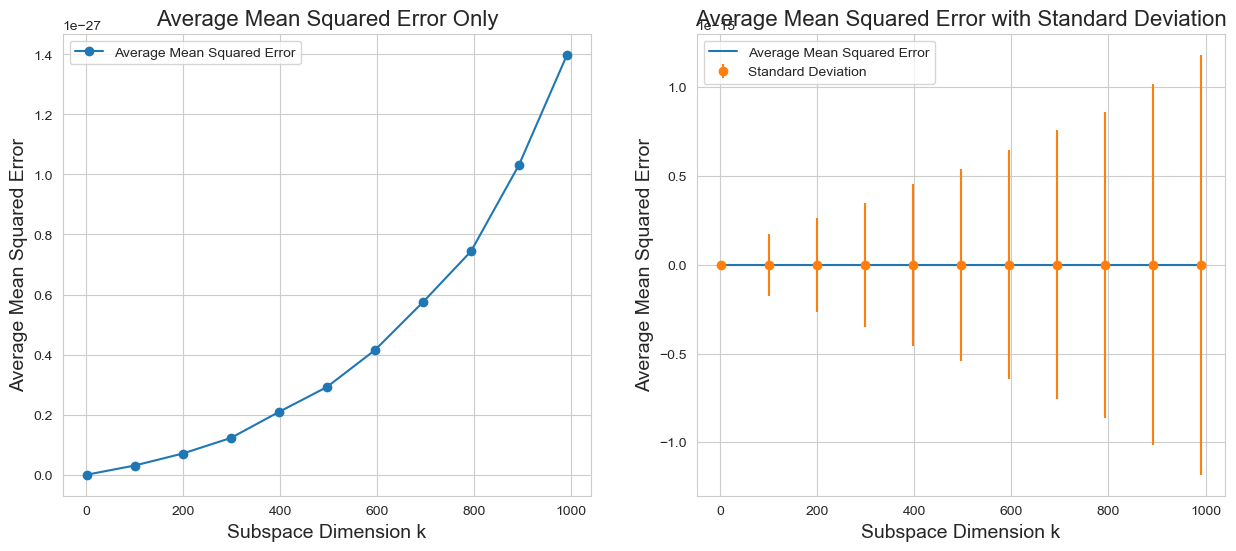

In [7]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Average Mean Squared Error Only', fontsize=16)
plt.plot(k_list, avg_mse, 'o-', label='Average Mean Squared Error')
plt.xlabel('Subspace Dimension k', fontsize=14)
plt.ylabel('Average Mean Squared Error', fontsize=14)
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.title('Average Mean Squared Error with Standard Deviation', fontsize=16)
plt.plot(k_list, avg_mse, label='Average Mean Squared Error')
plt.errorbar(k_list, avg_mse, yerr=stdevs, fmt='o', label='Standard Deviation')
plt.xlabel('Subspace Dimension k', fontsize=14)
plt.ylabel('Average Mean Squared Error', fontsize=14)
plt.legend(loc='upper left')

We can see that the error increases with increasing k, thus the algortihm denoises more if we decrease the subspace. The same increase can be seen in the standard deviation as well.
